<a href="https://colab.research.google.com/github/tongtiger/KUanwjrrlrP/blob/master/kaggle/titanic/model_20_7_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
dataset = pd.read_csv("/content/drive/Shared drives/Kaggle/titanic/data/train_data_20_7_28.csv")

dataset = dataset.drop(columns=['Unnamed: 0', 'Ticket', 'Fare', 'Cabin'])

dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,1
1,1,1,0,38.0,1,0,2
2,1,3,0,26.0,0,0,1
3,1,1,0,35.0,1,0,1
4,0,3,1,35.0,0,0,1
...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,1
885,1,1,0,19.0,0,0,1
886,0,3,0,1.0,1,2,1
887,1,1,1,26.0,0,0,2


#데이터 전처리

데이터에서 'Ticket'과 'Fare'가 클래스('Survived')에 영향을 미치지 못하는 것으로 보여서 둘 중 하나만 제거하거나 둘 다 제거하는 것을 시도해보았다. 결과는 다음과 같이 나왔다.

0.765: Ticket 제외

0.6409: Fare 제외

 0.8181: Ticket, Fare 모두 제외

일단 Ticket만 제외했을 때, 모델 정확성이 상당히 올라가는 것을 확인할 수 있었고 Fare만 제거했을 경우에는 별다른 향상을 확인하기 어려웠다. 하지만 둘 다 제거를 하니, Ticket만 제외했을 때보다 정확성이 올라갔다. 어떤 변수를 제외해야할 지, 서로 간의 상관관계를 알아보기 위해, 하단 코드에서 maplotlib와 seaborn을 이용하여 heatmap을 그려보았는데, 예상대로 Ticket과 Survived의 상관관계가 낮게 나왔다. 하지만 이상한건 Sibsp와 Parch역시 Survived와 상관관계까 낮게 나왔다는 것이다. 원인을 찾아보니, heatmap에서의 상관관계는 '변수의 변화 방향성'에 관한 것이지, '인과 관계'가 아니라고 한다. 자세한 것은 아래 링크를 참고하면 된다.
[상관관계 분석](https://m.blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=221205309816&proxyReferer=https:%2F%2Fwww.google.com%2F) 인과관계를 판단하는 방법은 추가적으로 알아봐야할 것 같다. 

이 외에 데이터 전처리와 관련하여 문서를 찾아보니, 결측치를 처리하는 방법 또한 여러가지가 있더라. 이를 알아보고 적절하게 적용해야할 것 같다. 


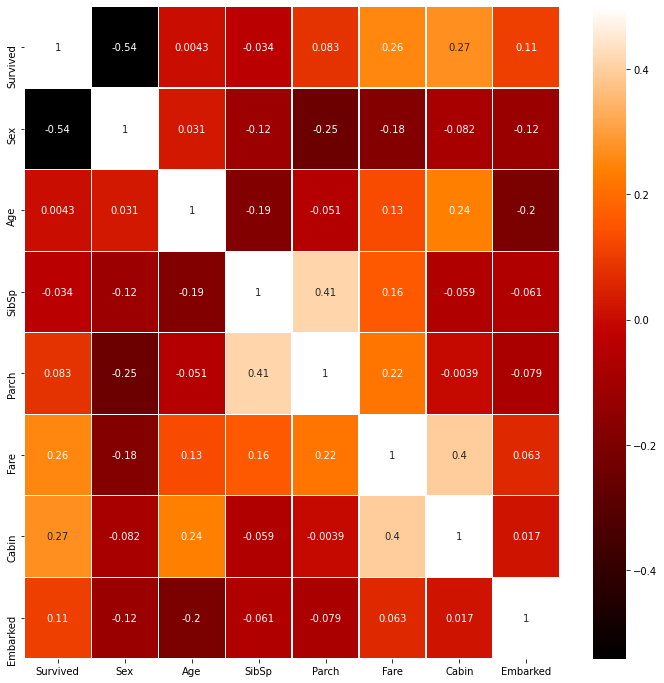

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 12))

sns.heatmap(dataset.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot = True)

plt.show()

In [ ]:
dataset = dataset.values  #이 경우, 이미 dataset이 numpy array여서 해당 구문을 작성할 필요가 없음. 이거 자꾸 왔다갔다 하네...

X = dataset[:, 1:6+1]
Y = dataset[:, 0]

In [ ]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)'''

'from sklearn.model_selection import train_test_split\n\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)'

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)

In [ ]:
'''model = Sequential()
model.add(Dense(12, input_dim = 9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 100, batch_size = 20)

print("Accuracy: ", model.evaluate(X_test, Y_test)[1])'''

'model = Sequential()\nmodel.add(Dense(12, input_dim = 9, activation=\'relu\'))\nmodel.add(Dense(8, activation=\'relu\'))\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\nmodel.compile(loss = \'binary_crossentropy\', optimizer = \'adam\', metrics = [\'accuracy\'])\n\nmodel.fit(X_train, Y_train, epochs = 100, batch_size = 20)\n\nprint("Accuracy: ", model.evaluate(X_test, Y_test)[1])'

In [ ]:
accuracy = []

for train, test in skf.split(X, Y):
  model = Sequential()
  model.add(Dense(24, input_dim = 6, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  model.fit(X[train], Y[train], epochs = 100, batch_size = 50)
  accuracy.append(model.evaluate(X[test], Y[test])[1])

accuracy_sum = 0
for point in accuracy:
  accuracy_sum += point

print(accuracy_sum/10) #7/27 데이터 사용 시, 0.765: Ticket 제외, 0.6409: Fare 제외, 0.8181: Ticket, Fare 모두 제외
                      #7/28 데이터 사용 시, 0.7727: Ticket 제외, 0.8042: Ticket, Fare 제외, 0.7929: Ticket, Fare, Embarked 제외, 0.8199: Ticket, Fare, Cabin 제외
                      #0.8053: Ticket, Fare, Cabin, Embarked 제외

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.6200
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6263
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.6450
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.6463
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.6650
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.6837
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5809 - accuracy: 0.6850
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7025
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.7025
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7075
Epoch 11/